# Exploratory data analysis

- data url: https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/

## Import packages and load data


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

d = pd.read_csv("../data/train.csv")
d = d.iloc[:,1:]  ## remove id
d.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


## Character features

### To do list

- For each of the character features, look at the number of unique values
- For each of the character features, look at the missing values

### Actions on the findings

- **recorded_by** is the same for all the samples, <font color='red'>need to be removed</font>
- **wpt_name,subvillage,scheme_name,installer,ward,funder** has unique values >1000, <font color='red'>need to further re-group them</font>
- Take 0 as missing value (NA) for funder and installer features, update data by setting 0 to NA
- **scheme_name** has 47.418% samples with missing value, need to be removed



#### look at the number of unique values

In [2]:
## subset of the train dataset whose datatype is object(string)
character_features_df = d.loc[:, d.dtypes == object]
print(character_features_df.dtypes)
character_features_df.head()

date_recorded            object
funder                   object
installer                object
wpt_name                 object
basin                    object
subvillage               object
region                   object
lga                      object
ward                     object
public_meeting           object
recorded_by              object
scheme_management        object
scheme_name              object
permit                   object
extraction_type          object
extraction_type_group    object
extraction_type_class    object
management               object
management_group         object
payment                  object
payment_type             object
water_quality            object
quality_group            object
quantity                 object
quantity_group           object
source                   object
source_type              object
source_class             object
waterpoint_type          object
waterpoint_type_group    object
dtype: object


,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,2011-03-14,Roman,Roman,none,Lake Nyasa,Mnyusi B,Iringa,Ludewa,Mundindi,True,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,2013-03-06,Grumeti,GRUMETI,Zahanati,Lake Victoria,Nyamara,Mara,Serengeti,Natta,NaN,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,2013-02-25,Lottery Club,World vision,Kwa Mahundi,Pangani,Majengo,Manyara,Simanjiro,Ngorika,True,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,2013-01-28,Unicef,UNICEF,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,Nanyumbu,Nanyumbu,True,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,2011-07-13,Action In A,Artisan,Shuleni,Lake Victoria,Kyanyamisa,Kagera,Karagwe,Nyakasimbi,True,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
## Get unique values for each character features
charF_nunique = character_features_df.apply(pd.Series.nunique)
## charF_nunique
aa  = pd.DataFrame({"feature":charF_nunique.index,"number":charF_nunique})
aa = aa.sort_values("number")
aa

,feature,number
recorded_by,recorded_by,1
public_meeting,public_meeting,2
permit,permit,2
source_class,source_class,3
management_group,management_group,5
quantity_group,quantity_group,5
quantity,quantity,5
waterpoint_type_group,waterpoint_type_group,6
quality_group,quality_group,6
payment_type,payment_type,7


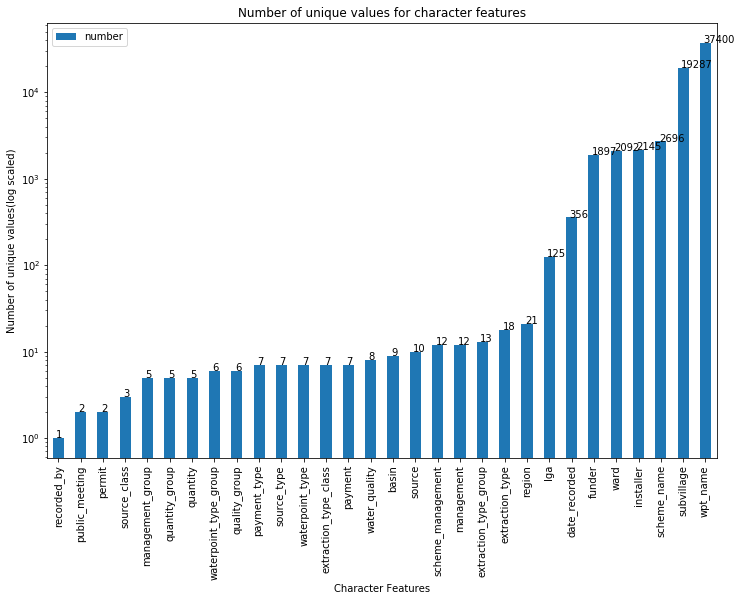

In [4]:
## Barplot it
ax = aa.plot(kind="bar",logy=True,figsize=(12,8)) 
ax.figure
ax.set_xlabel('Character Features')
ax.set_ylabel('Number of unique values(log scaled)')
ax.set_title('Number of unique values for character features')

for idx, label in enumerate(list(aa.index)): 
    acc = "number"
    value = np.round(aa.iloc[idx][acc],decimals=2)
    ax.annotate(value,(idx, value),
                         xytext=(-2, 0), 
                         textcoords='offset points')

#### For each of the character features, look at the missing values

In [5]:
### Look at missing values
### Missing value could be NA or 0 or -
f=character_features_df.loc[:,"funder"]
character_features_df.loc[f=="0",:].head()

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
145,2013-03-21,0,0,Chekanao,Wami / Ruvu,Mtaa Wa Kitunda Kati,Dar es Salaam,Ilala,Kitunda,NaN,...,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
152,2013-03-16,0,0,Msikitini,Wami / Ruvu,Madrasa,Dar es Salaam,Temeke,Kimbiji,True,...,never pay,salty,salty,dry,dry,machine dbh,borehole,groundwater,other,other
393,2013-03-18,0,0,Kwa Chambuso,Wami / Ruvu,Mtaa Wa Mji Mpya,Dar es Salaam,Ilala,Kitunda,NaN,...,unknown,unknown,unknown,unknown,unknown,machine dbh,borehole,groundwater,other,other
417,2013-03-22,0,0,Ccm Kivule,Wami / Ruvu,Mtaa Wa Kivule,Dar es Salaam,Ilala,Msongola,NaN,...,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
428,2013-03-12,0,0,Ofisi Ya Kata,Wami / Ruvu,Mtaa Yangeyange,Dar es Salaam,Ilala,Msongola,True,...,never pay,unknown,unknown,dry,dry,shallow well,shallow well,groundwater,other,other


In [6]:
### see which character features has 0
(character_features_df == "0").sum().pipe(lambda x: x[x>0])
 

funder       777
installer    777
dtype: int64

In [7]:
(character_features_df == "-").sum().pipe(lambda x: x[x>0])

installer    3
dtype: int64

In [8]:
### change 0/- to NA
character_features_df["funder"] = np.where(character_features_df["funder"]=="0",np.NAN,character_features_df['funder'])
character_features_df["installer"] = np.where(character_features_df["installer"]=="0",np.NAN,character_features_df['installer'])
character_features_df["installer"] = np.where(character_features_df["installer"]=="-",np.NAN,character_features_df['installer'])


/Users/jiangli/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jiangli/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jiangli/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

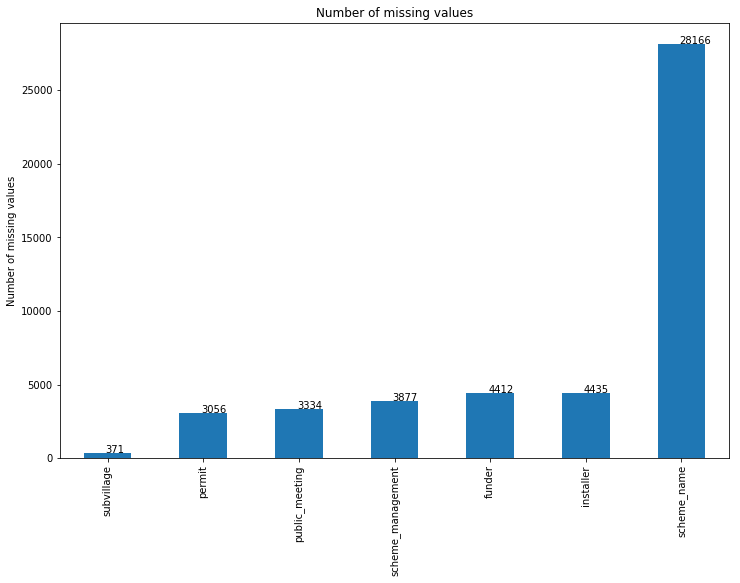

In [9]:
### See number of NA values for each character
navalues = character_features_df.isnull().sum().pipe(lambda x: x[x>0])
navalues = navalues.sort_values()
ax = navalues.plot(kind="bar",figsize=(12,8))
ax.set_ylabel('Number of missing values')
ax.set_title('Number of missing values')

for idx, label in enumerate(list(navalues.index)): 
    value = np.round(navalues.iloc[idx],decimals=2)
    ax.annotate(value,(idx, value),
                         xytext=(-2, 0), 
                         textcoords='offset points')

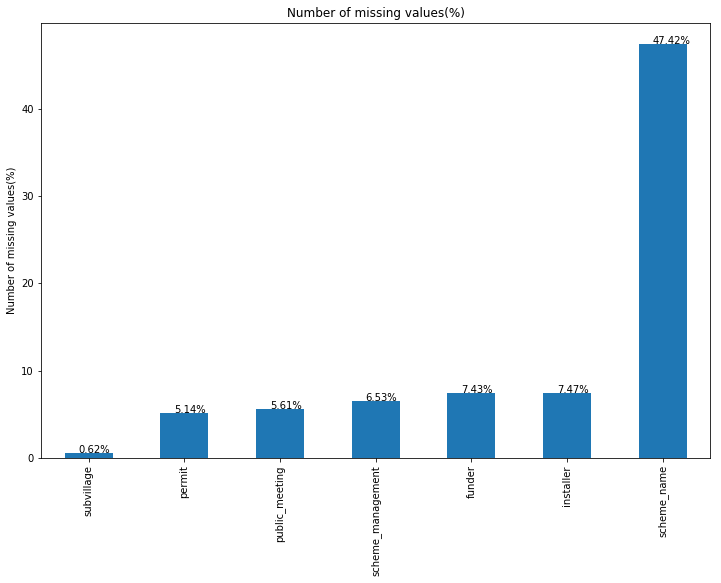

In [10]:
## In terms of percentage
n = character_features_df.shape[0]
navalues_pct = navalues/n * 100

ax = navalues_pct.plot(kind="bar",figsize=(12,8))
ax.set_ylabel('Number of missing values(%)')
ax.set_title('Number of missing values(%)')

for idx, label in enumerate(list(navalues_pct.index)): 
    value = np.round(navalues_pct.iloc[idx],decimals=2)
    value2 = str(value)+"%"
    ax.annotate(value2,(idx, value),
                         xytext=(-10, 0), 
                         textcoords='offset points')


##  Numeric features

### To do list

- For each of the numeric features, look at the density distribution
- For each of the numeric features, look at the missing values

### Actions on the findings

- From density distribution, it looks like value 0 is coded as missing value in the dataset.
- num_private has most missing values (98.7%), need to be removed
- amount_tsh has 2nd most missing values (70%), need to be removed


In [11]:
numeric_features_df = d.loc[:, d.dtypes != object]
print(numeric_features_df.dtypes)
numeric_features_df.head()

amount_tsh           float64
gps_height             int64
longitude            float64
latitude             float64
num_private            int64
region_code            int64
district_code          int64
population             int64
construction_year      int64
dtype: object


,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
0,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999
1,0.0,1399,34.698766,-2.147466,0,20,2,280,2010
2,25.0,686,37.460664,-3.821329,0,21,4,250,2009
3,0.0,263,38.486161,-11.155298,0,90,63,58,1986
4,0.0,0,31.130847,-1.825359,0,18,1,0,0


In [12]:
list(numeric_features_df.columns)

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year']

/Users/jiangli/anaconda2/lib/python2.7/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/jiangli/anaconda2/lib/python2.7/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/jiangli/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


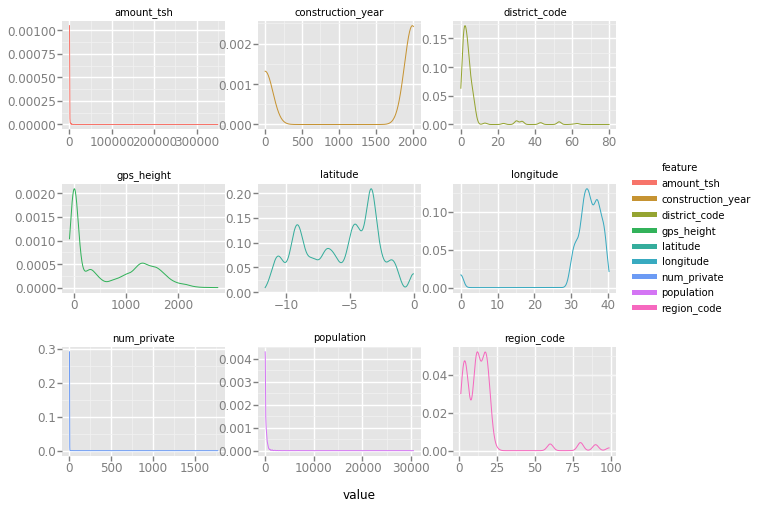

<ggplot: (278134305)>

In [13]:
### see the distribution
df = numeric_features_df.melt(id_vars=[],value_vars=list(numeric_features_df.columns),var_name="feature",value_name="value")
from ggplot import *

ggplot(df,aes("value",color="feature")) + geom_density()+facet_wrap("feature",scales="free")



In [14]:
### From the distribution plot, it looks like 0 is coded as missing values  
### see which numeric features has 0
aa = (numeric_features_df == 0 ).sum().pipe(lambda x: x[x>0]).sort_values()
aa

district_code           23
longitude             1812
gps_height           20438
construction_year    20709
population           21381
amount_tsh           41639
num_private          58643
dtype: int64

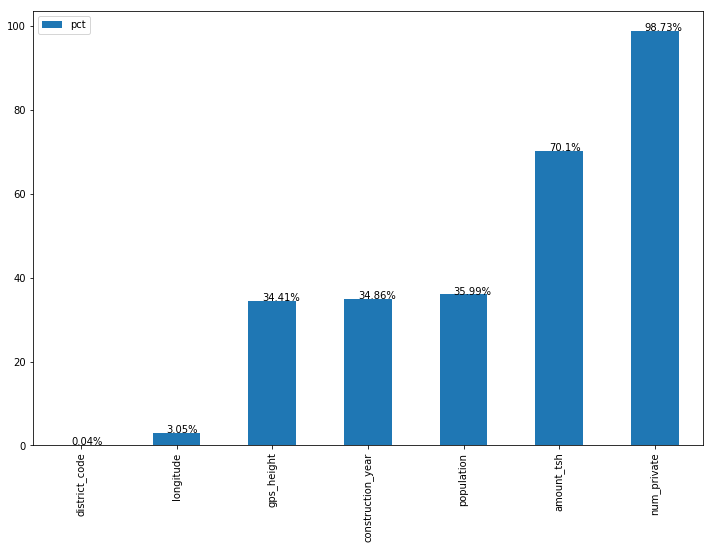

In [15]:
## Visulize it 
dd = pd.DataFrame({"feature":aa.index,"pct":aa/n*100})
ax = dd.plot(kind="bar",figsize=(12,8))
for idx, label in enumerate(list(dd.index)): 
    value = np.round(dd.iloc[idx]['pct'],decimals=2)
    value2 = str(value)+"%"
    ax.annotate(value2,(idx, value),
                         xytext=(-10, 0), 
                         textcoords='offset points')



## Feature correlation

We noticed that some of the features are highly correlated. Here are the feature will be suggested to remove.

- **"lga","region","basin"** ,correlated other region information
- **"extraction_type_group","extraction_type_class"**, correlated with 'extraction_type'
- **"management_group"**, correlated with 'management'
- **"payment_type"**, correlated with 'payment'
- **"quality_group"**, correlated with 'quality'
- **"quantity_group"**, correlated with 'quantity'
- **"source_type","source_class"**, correlated with 'source'
- **"waterpoint_type_group"**, correlated with 'waterpoint_type'


![correlation](cor.png)